### Please submit all of the first homework assigment in this file

Name: Laura Rossi


Import relevant libraries:

In [41]:
import time
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import random

Question 1a: Implementation of iterative factorial

In [42]:
def iterativeFactorial(n):
    if (type(n)!= int or abs(n)!=n): #error handling 
        print(n, "is not a non-negative integer")
        n=int(input("Please input a non negative integer")) 
    
    if n==1 or n == 0:  # base case
        return 1
    elif n>1:
        Result = 1
        i = n
        while i > 0:
            Result = Result * i 
            i=i-1
    return Result          

Test iterative factorial:

In [44]:
iterativeFactorial(98)

9426890448883247745626185743057242473809693764078951663494238777294707070023223798882976159207729119823605850588608460429412647567360000000000000000000000

Question 1b: Convert integer to binary string

In [73]:
def toBinStr(number):
    '''converts integers to binary'''
    
    try:
        abs(number)
    except:
        print ("It looks like your input is not an integer. Please input na integer.")
        number=int(input())
    
    binStr = "01"
    
    if -2 < number <2: # no recursion
        if number <0: # negative numbers
            return ("-" + binStr[int(number)])
        else: #non-negative
            return binStr[int(number)]
    elif number <= -2: #recursion, negatives
        return "-"+toBinStr(number/-2)+binStr[number%-2]
    elif number >= 2: #recursion, non-negatives
        return toBinStr(int(number/2))+binStr[int(number%2)]

Test toBinStr()

In [76]:
toBinStr(3)

'11'

Question 2:

In [154]:
def recursiveBinSearch(myList, item):
    '''searches for item in myList recursively'''
    try:
        myList.copy()
    except:
        print("Looks like your first argument may not be a list. Please retry")
        return
    
    lowerLimit = 0 # smallest possible index for the item
    upperLimit = len(myList)-1 # largest possible index for the item

    if upperLimit <= 1: #base cases
        if myList[0] == item: 
            return True
        elif len(myList) > 1:
            if myList[1] == item:
                return True
            else:
                return False
        else:
            return False
        
    elif lowerLimit <= upperLimit: #recursions
        # check if the item is at midpoint. If it is, return True. If it is not, halve the range to the left half if 
        # the item at midpoint is bigger that the item we are searching for and the right otherwise
        midpoint = (upperLimit + lowerLimit) // 2
        if item <= myList[midpoint]: 
            myList = myList[0:midpoint+1]
            return recursiveBinSearch(myList,item)
        elif item >= myList[midpoint]:
            myList = myList[midpoint:upperLimit+1]
            return recursiveBinSearch(myList,item)

Test recursiveBinSearch():

In [157]:
recursiveBinSearch([6,8,8],8)

True

Test runtimes of three different search functions:

In [52]:
# function to produce sorted lists for testing
def sortedList(n):
    '''Produces a sorted lsit of all integers between 0 and n'''
    myList = []
    for i in range(n):
        myList.append(i)
    return myList    

In [53]:
#iterative search from week 1 
def findItem(myList, item):
    i=0
    while i<len(myList):
        if myList[i]==item:
            return True
        i = i+1
    return False  

In [54]:
#non recursive binary search from week 1 
def findItemInSortedListFast(myList, item):
    lowerLimit = 0 # smallest possible index for the item
    upperLimit = len(myList)-1 # largest possible index for the item
    i=0 
    while lowerLimit <= upperLimit:
        i=i+1
        # check if the item is at midpoint. If it is, return True. If it is not, halve the range to the left half if 
        # the item at midpoint is bigger that the item we are searching for and the right otherwise
        midpoint = (upperLimit + lowerLimit) // 2
        if myList[midpoint]==item:
            return (True,i)
        elif myList[midpoint]<item:
            lowerLimit = midpoint+1
        else:
            upperLimit = midpoint-1
    return (False,i+1)

In [129]:
#uses sortedList() to run all search functions on n lists of lengths 1 through n and returns list with output: item searched, list length, runtime
inputs = []
n=200
for i in range(n):
    inputs.append(sortedList(i+2))
    
outputsIterative = []
for i in range(n):
    lookupItem=random.randrange(n)
    startTime=time.perf_counter() 
    findItem(inputs[i],lookupItem)
    endTime=time.perf_counter() 
    outputsIterative.append([lookupItem,i,endTime-startTime,"Iterative"])

outputsBinary = []
for i in range(n):
    lookupItem=random.randrange(n)
    startTime=time.perf_counter() 
    findItemInSortedListFast(inputs[i],lookupItem)
    endTime=time.perf_counter() 
    outputsBinary.append(([lookupItem,i,endTime-startTime,"Binary"]))

outputsBinaryRecursive = []
for i in range(n):
    lookupItem=random.randrange(n)
    startTime=time.perf_counter() 
    recursiveBinSearch(inputs[i],lookupItem)
    endTime=time.perf_counter() 
    outputsBinaryRecursive.append(([lookupItem,i,endTime-startTime,"Recursive"]))

In [130]:
#builds dataframe with runtimes
allOutput = outputsIterative+outputsBinary+outputsBinaryRecursive
#print(allOutput)
# plot the three lists of tuples!!
df=pd.DataFrame(allOutput,columns=["Item","ListLength","RunTime","Function"])
df

,Item,ListLength,RunTime,Function
0,29,0,0.000004,Iterative
1,131,1,0.000002,Iterative
2,182,2,0.000003,Iterative
3,22,3,0.000003,Iterative
4,76,4,0.000004,Iterative
...,...,...,...,...
595,9,195,0.000005,Recursive
596,192,196,0.000006,Recursive
597,155,197,0.000005,Recursive
598,131,198,0.000004,Recursive


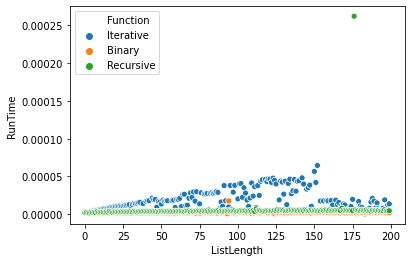

In [131]:
plt1=sns.scatterplot(x="ListLength", y="RunTime",
              hue="Function",
              data=df);

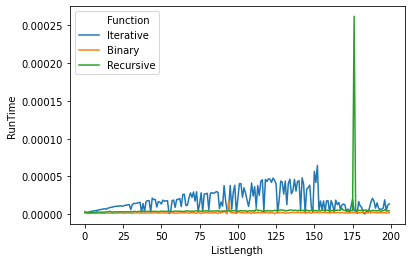

In [132]:
plt2=sns.lineplot(x="ListLength", y="RunTime",
              hue="Function",data=df)

Question 3: 

In [133]:
#improting dataset
# dataset: # https://www.kaggle.com/shivam2503/diamonds
# Diamonds dataset from kaggle. This is the diamonds dataset that comes with R's ggplot2 library. 
#I downloaded it to the same directory this script is in.  

diamonds = pd.read_csv("diamonds.csv")
diamonds[1:10] #glimpse into dataset 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


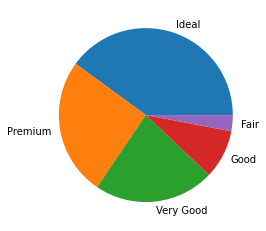

In [136]:
# plot 1
c=diamonds["cut"].value_counts()
plt2=plt.pie(c,labels=["Ideal","Premium","Very Good","Good","Fair"])

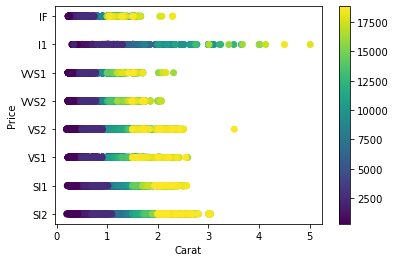

In [140]:
#Another plot, for the fun of it: 
plt3=plt.scatter(diamonds.carat,diamonds.clarity,c=diamonds.price)
plt.xlabel("Carat")
plt.ylabel("Price")
_=plt.colorbar()

Question 4:

In [141]:
def insertionSort(aList):
    try:
        aList.copy()
    except:
        print ("Looks like your input may not be a list, please check")
    
    if len(aList) <=1: 
        return aList
    else:
        for j in range(0,len(aList)):
            key = aList[j]
            i = j-1
            while aList[i]>key and  i>=0:
                aList[i+1]=aList[i]
                i=i-1
            aList[i+1]=key
    return aList

In [147]:
insertionSort([5,6,8,2,5])

[2, 5, 5, 6, 8]

In [25]:
def mergeSort(aList):
    if len(aList) > 1: 
        low = 0
        high = len(aList)
        middle = len(aList)//2
        halfLow = aList[low:middle]
        halfHigh = aList[middle:high] #middle element goes in bottom half
    
        mergeSort(halfLow) #recursion low
        mergeSort(halfHigh) #recursion high
    
        i=j=k=0 
        #merge(half1+half2)
        while i < len(halfLow) and j < len(halfHigh):
            if halfLow[i] < halfHigh[j]:
                aList[k] = halfLow[i]
                i += 1
            else:
                aList[k] = halfHigh[j]
                j += 1
            k += 1
            
        while i < len(halfLow):
            aList[k] = halfLow[i]
            i += 1
            k += 1

        while j < len(halfHigh):
            aList[k]=halfHigh[j]
            j += 1
            k += 1
            
    return aList

In [26]:
mergeSort(["a","b","a"])

['a', 'a', 'b']

In [32]:
#produces size n random list of integers for testing sorting functions
def unsortedList(n):
    aList = []
    for i in range(n-1):
        aList.append(random.randrange(-100,100))
    return aList

In [37]:
#pass inputs, collect runtime

n = 500
inputs = []
for i in range(n):
    inputs.append(unsortedList(n))
    i = i+1

outputInsertion=[]
outputMerge = []
for i in range(n):
    startTime=time.perf_counter() 
    insertionSort(inputs[i])
    endTime=time.perf_counter() 
    outputInsertion.append(([i,endTime-startTime,"Insertion"]))
    
for i in range(n):
    startTime=time.perf_counter() 
    mergeSort(inputs[i])
    endTime=time.perf_counter() 
    outputMerge.append(([i,endTime-startTime,"Merge"]))

In [38]:
#builds dataframe with runtimes
allOutput = outputInsertion+outputMerge
#print(allOutput)
# plot the three lists of tuples!!
df2=pd.DataFrame(allOutput,columns=["n","RunTime","Function"])
df2

,n,RunTime,Function
0,0,0.009579,Insertion
1,1,0.010655,Insertion
2,2,0.010482,Insertion
3,3,0.010092,Insertion
4,4,0.010224,Insertion
...,...,...,...
995,495,0.001398,Merge
996,496,0.001491,Merge
997,497,0.001588,Merge
998,498,0.001448,Merge


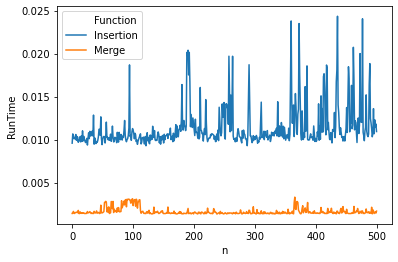

In [39]:
plt2=sns.lineplot(x="n", y="RunTime",hue="Function",data=df2)